**Задание 1.** Загрузите набор данных `cardiovascular_disease.csv`. Описание данной задачи приведено в приложенном pdf-файле. Проведите первичный анализ данных. Возраст пациентов указан в днях. Создайте вместо него новый признак "возраст в годах", а также с помощью One-hot-encoding преобразуйте признаки `cholesterol` и `gluc` (можно воспользоваться функцией `pandas.get_dummmies`).

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [40]:
data = pd.read_csv(r'C:\Users\Lenovo\Documents\cardiovascular_disease.csv')
data['age_y'] = data.age/365.25
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_y
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


In [41]:
def name_func(df, column_names):
    dfs = []
    enc = OneHotEncoder(sparse=False)
    for col in column_names:
        temp = enc.fit_transform(df[f'{col}'].values.reshape(-1, 1))
        dfs.append(pd.DataFrame(temp, columns=[f'{col}={i}' for i in range(temp.shape[1])]))
    return pd.concat(dfs, axis=1)

In [43]:
x=name_func(data,['cholesterol','gluc'])
x

,cholesterol=0,cholesterol=1,cholesterol=2,gluc=0,gluc=1,gluc=2
0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,1.0,0.0
99996,0.0,0.0,1.0,1.0,0.0,0.0
99997,0.0,0.0,1.0,1.0,0.0,0.0
99998,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
data1 = pd.concat([data.drop(['cholesterol','gluc'],axis=1),x],axis=1)
data1

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_y,cholesterol=0,cholesterol=1,cholesterol=2,gluc=0,gluc=1,gluc=2
0,18393,2,168,62.0,110,80,0,0,1,0,50.357290,1.0,0.0,0.0,1.0,0.0,0.0
1,20228,1,156,85.0,140,90,0,0,1,1,55.381246,0.0,0.0,1.0,1.0,0.0,0.0
2,18857,1,165,64.0,130,70,0,0,0,1,51.627652,0.0,0.0,1.0,1.0,0.0,0.0
3,17623,2,169,82.0,150,100,0,0,1,1,48.249144,1.0,0.0,0.0,1.0,0.0,0.0
4,17474,1,156,56.0,100,60,0,0,0,0,47.841205,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22601,1,158,126.0,140,90,0,0,1,1,61.878166,0.0,1.0,0.0,0.0,1.0,0.0
99996,19066,2,183,105.0,180,90,0,1,0,1,52.199863,0.0,0.0,1.0,1.0,0.0,0.0
99997,16035,2,176,75.0,120,80,0,0,1,1,43.901437,0.0,0.0,1.0,1.0,0.0,0.0
99998,22431,1,163,72.0,135,80,0,0,0,1,61.412731,1.0,0.0,0.0,0.0,1.0,0.0


**Задание 2.** Разбейте выборку на обучающую и контрольную в соотношении 70%/30% (`sklearn.model_selection.train_test_split`).

In [48]:
y = data.cardio
X = data.drop(['cardio'],axis=1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=3442)

**Задание 3.** Обучите на выборке `(X_train, y_train)` дерево решений глубины 3 (`max_depth=3`, не забудьте указать `random_state`). Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`.  Какие 3 признака задействуются при прогнозе в построенном дереве решений?

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [118]:
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [112]:
export_graphviz(clf, out_file='decision_tree.dot',
                filled=True,
                feature_names=X.columns,
                class_names=['0', '1'])

ValueError: Length of feature_names, 12 does not match number of features, 13

In [119]:
print(tree.export_text(clf))

|--- feature_4 <= 129.50
|   |--- feature_11 <= 55.12
|   |   |--- feature_6 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  2.50
|   |   |   |--- class: 1
|   |--- feature_11 >  55.12
|   |   |--- feature_6 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  2.50
|   |   |   |--- class: 1
|--- feature_4 >  129.50
|   |--- feature_4 <= 138.50
|   |   |--- feature_6 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  2.50
|   |   |   |--- class: 1
|   |--- feature_4 >  138.50
|   |   |--- feature_4 <= 149.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  149.50
|   |   |   |--- class: 1



**Задание 4.** Постройте предсказания для тестовой выборки и вычислите долю верных ответов на ней (`sklearn.metrics.accuracy_score`).

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6357

**Задание 5.** Воспользуйтесь функцией `sklearn.model_selection.GridSearchCV`, чтобы определить оптимальную глубину решающего дерева методом кросс-валидации по 5 блокам. Зафиксируйте у дерева `random_state`. Рассмотрите значения параметра `max_depth` от 2 до 10. 

In [58]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [59]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
tree_params = {'class_weight': ['balanced', None],
               'max_depth': list(range(2,11))}
grid_search = GridSearchCV(clf, tree_params, scoring='accuracy', cv=skf)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [60]:
grid_search.best_params_

{'class_weight': 'balanced', 'max_depth': 6}

**Задание 6.** Отобразите на графике, как меняется accuracy на кросс-валидации в зависимости от значения `max_depth`. Выведите лучшее значение `max_depth`.

In [65]:
def test(x,X_train1=X_train,y_train1=y_train,X_test1=X_test,y_test1 = y_test):
    clf1 = DecisionTreeClassifier(random_state=42,max_depth=x)
    clf1.fit(X_train1, y_train1)
    y_pred1 = clf1.predict(X_test1)
    return accuracy_score(y_test1, y_pred1)


In [67]:
import matplotlib.pyplot as plt

In [68]:
res = [test(x) for x in range(2,11)]

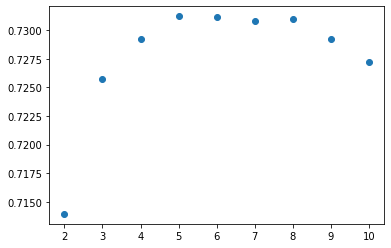

In [70]:
fig = plt.figure()
plt.scatter(x=list(range(2,11)),y=res)
plt.show()

**Задание 7.**

Создайте бинарные признаки, примерно соответствующие картинке ниже:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака);
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/SCORE2007.png/900px-SCORE2007.png">

In [72]:
def between(x,a,b):
    return a<= x <b

In [90]:
def onht(df, step,st):
    for i in range(1,6):
        df[f'age_group {i}'] = df['age_y'].apply(lambda x: between(x,st+step*i,st+step*(i+1))).astype(int)
    return df

def onff(df, step,st):
    for i in range(1,4):
        df[f'ap_hi {i}'] = df['ap_hi'].apply(lambda x: between(x,st+step*i,st+step*(i+1))).astype(int)
    return df

In [91]:
tmp2= onff(onht(data,5,40),20,120)
tmp2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,cardio,age_y,age_group 1,age_group 2,age_group 3,age_group 4,age_group 5,ap_hi 1,ap_hi 2,ap_hi 3
0,18393,2,168,62.0,110,80,1,1,0,0,...,0,50.357290,0,1,0,0,0,0,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,...,1,55.381246,0,0,1,0,0,1,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,...,1,51.627652,0,1,0,0,0,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,...,1,48.249144,1,0,0,0,0,1,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,...,0,47.841205,1,0,0,0,0,0,0,0


**Задание 8.** Построим дерево решений на полученных из шкалы SCORE признаках, а также с признаками `smoke`, `cholesterol` (после OHE)  и `gender`. Значения признака `gender` преобразуйте в 0 и 1.

Постройте дерево решений глубины 3 на **исходной** обучающей выборке. Используйте `DecisionTreeClassifier`. Какой бинарный признак оказался в корне построенного дерева решений?

In [100]:
X_f = pd.concat([tmp2[['smoke','gender']],name_func(data,['cholesterol']),tmp2.iloc[:,13:]],axis=1)
X_f['gender'] = X_f.gender-1
X_f.head()

,smoke,gender,cholesterol=0,cholesterol=1,cholesterol=2,age_group 1,age_group 2,age_group 3,age_group 4,age_group 5,ap_hi 1,ap_hi 2,ap_hi 3
0,0,1,1.0,0.0,0.0,0,1,0,0,0,0,0,0
1,0,0,0.0,0.0,1.0,0,0,1,0,0,1,0,0
2,0,0,0.0,0.0,1.0,0,1,0,0,0,0,0,0
3,0,1,1.0,0.0,0.0,1,0,0,0,0,1,0,0
4,0,0,1.0,0.0,0.0,1,0,0,0,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y, stratify=y, test_size=0.3, random_state=3442)

In [121]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [122]:
clf = DecisionTreeClassifier(random_state=42,max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7257333333333333

In [108]:
print(tree.export_text(clf))

|--- feature_10 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 1
|   |--- feature_11 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 1
|--- feature_10 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 1



In [123]:
clf1 = BaggingClassifier(random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test,y_pred)

0.6918333333333333

In [125]:
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test,y_pred)

0.7191